In [1]:
%load_ext autoreload 
%autoreload 2

# imports and setup
import pandas as pd
import numpy as np
import os 

# import and instanciate config file to get access to paths
os.chdir(os.path.dirname(os.getcwd()))
from config.config import Config
config = Config()

# import utils functions
from src.pipelines.preprocessor import Preprocessor
from src.pipelines.models import Models
from sklearn import set_config; set_config(display='diagram')

In [2]:
from src.pipelines.preproc.pipeline_045 import build_preprocessor_pipeline_045

with open(os.path.join(config.DATA_PROCESSED_PATH, 'books_processed.csv'), 'r') as f:
    books = pd.read_csv(f)

books

,Author,Book
0,Twain Mark,﻿The Project Gutenberg EBook of Chapters from ...
1,Plato,"﻿The Project Gutenberg EBook of Sophist, by Pl..."
2,Twain Mark,﻿The Project Gutenberg EBook of On the Decay o...
3,Shakespeare William,"﻿The Project Gutenberg eBook of Pericles, by W..."
4,Shakespeare William,﻿The Project Gutenberg eBook of As You Like It...
...,...,...
431,Twain Mark,﻿The Project Gutenberg EBook of Life On The Mi...
432,Twain Mark,﻿The Project Gutenberg EBook of A Tramp Abroad...
433,Austen Jane,﻿The Project Gutenberg eBook of Sense and Sens...
434,Shakespeare William,﻿\nProject Gutenberg Etext of The Rape of Lucr...


In [3]:
pipe045 = build_preprocessor_pipeline_045()
books_chunked_vec = pipe045.fit_transform(books)
books_chunked_vec

,Author,Book
0,0,"[[0.09732702, -0.19285098, 0.57573694, 0.26288..."
1,0,"[[0.21627177, 0.21684551, -0.3217837, -0.18637..."
2,0,"[[0.06959727, -0.51864296, -0.09227154, 0.0633..."
3,0,"[[-0.000486169, 0.09628677, -0.029623983, -0.0..."
4,0,"[[0.3825136, -1.9102837, 3.7619069, 1.7127132,..."
...,...,...
9995,9,"[[-1.7807407, -3.254966, 1.679969, 1.0593946, ..."
9996,9,"[[-1.7807407, -3.254966, 1.679969, 1.0593946, ..."
9997,9,"[[-0.014674434, 0.2752076, 0.09305451, -0.0028..."
9998,9,"[[-1.2170954, -0.57367927, 0.91206944, -1.6051..."


In [5]:
import numpy as np

X = books_chunked_vec['Book']
y = books_chunked_vec['Author']

# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [9]:
X_train

9254    [[-2.1358194, 0.36748034, -0.4772223, 0.413831...
1561    [[-2.2355375, 1.19142, -2.8305616, -4.0874796,...
1670    [[0.24394011, 0.2315118, 0.10482082, -0.118494...
6087    [[-0.9019743, -3.5870354, 0.042416953, -0.0319...
6669    [[-0.8753002, 1.6147056, 0.2498276, -1.3214576...
                              ...                        
5734    [[1.9615262, -2.7088308, -1.6898253, -1.562306...
5191    [[2.5101736, 2.104913, -5.228734, -0.7872795, ...
5390    [[0.008349225, -0.021636004, 0.10126618, -0.12...
860     [[-0.15042056, 0.47845986, 0.27942264, -0.0779...
7270    [[-0.007282633, -0.055388834, 0.04101046, -0.0...
Name: Book, Length: 8000, dtype: object

In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train, y_test

(array([9, 1, 1, ..., 5, 0, 7]), array([6, 4, 1, ..., 7, 1, 6]))

In [7]:
y_train = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(y_test.reshape(-1, 1)).toarray()
y_train, y_test

(array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [18]:
X_train = np.array([np.vstack(X[i]) for i in range(len(X))])
X_test = np.array([np.vstack(X[i]) for i in range(len(X))])
X_train, X_test

(array([[[ 9.73270163e-02, -1.92850977e-01,  5.75736940e-01, ...,
          -1.30918816e-01,  1.77109629e-01, -7.53212571e-01],
         [ 1.01683717e-02, -5.63633628e-03,  3.30034234e-02, ...,
          -1.89782474e-02,  9.72750422e-04, -4.85289991e-02],
         [ 3.17385960e+00,  1.15723062e+00, -3.62703037e+00, ...,
          -3.52668619e+00, -1.50785732e+00,  1.52285025e-01],
         ...,
         [ 1.36392915e+00,  1.57719660e+00, -2.23499823e+00, ...,
          -4.21871841e-01, -7.82110631e-01, -1.75866950e+00],
         [ 3.86382341e-01,  5.09127080e-01,  2.46804380e+00, ...,
          -6.86163083e-02, -2.74593496e+00,  2.19164014e+00],
         [ 2.55179465e-01, -2.85211182e+00, -2.66693616e+00, ...,
          -1.67189658e+00, -2.38343358e+00,  2.80521798e+00]],
 
        [[ 2.16271773e-01,  2.16845512e-01, -3.21783692e-01, ...,
          -1.36589548e-02,  8.47933948e-01, -1.49760187e+00],
         [ 2.44705617e-01, -3.01750660e+00, -2.69920975e-01, ...,
          -6.56712711

In [19]:
from keras import Input, layers, Sequential, optimizers

model = Sequential()
model.add(Input(shape=(None, 60)))
model.add(layers.Masking())
model.add(layers.LSTM(60, activation='relu'))
# ou bien  model.add(layers.Dense(100, activation='relu'))

model.add(layers.Dense(10, activation="softmax"))
print("Model initialized")
optimizer = optimizers.Adam(learning_rate=0.001)

Model initialized


In [20]:
model.compile(loss='categorical_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])
print("Model compiled")

Model compiled


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, None, 60)          0         
                                                                 
 lstm (LSTM)                 (None, 60)                29040     
                                                                 
 dense (Dense)               (None, 10)                610       
                                                                 
Total params: 29650 (115.82 KB)
Trainable params: 29650 (115.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
    verbose=1)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    callbacks=[es],
    verbose=1)

print(history.history.keys())

Epoch 1/30
 67/125 [===============>..............] - ETA: 4s - loss: 2.3578 - accuracy: 0.1028

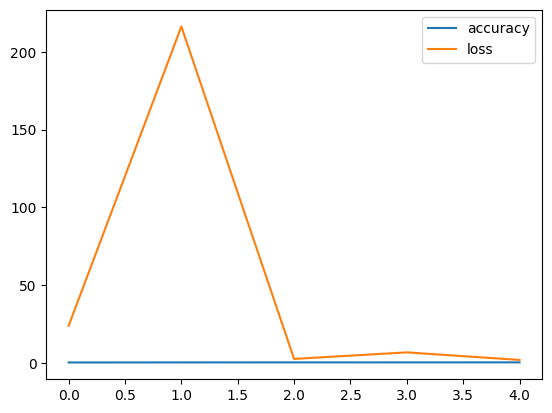

In [ ]:
# plot the history metrics
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

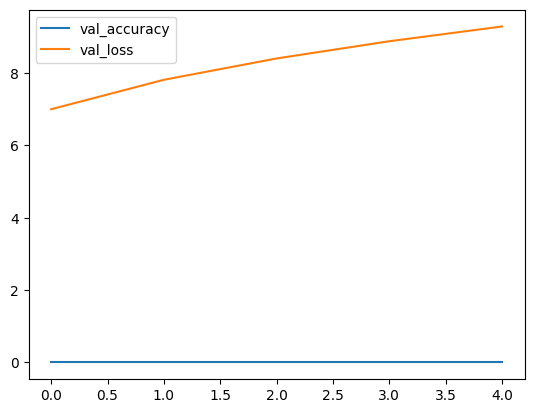

In [ ]:
# plot the history metrics
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()